In [44]:
# imPORT LIBRARIES 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import pi, sqrt
import handcalcs.render
import pandas as pd
import json 
# !pip install handcalcs

In [2]:
# CONFIGURATIONS
#help(handcalcs.set_option)
handcalcs.set_option("latex_block_start", "$")
handcalcs.set_option("latex_block_end", "$")
handcalcs.set_option("math_environment_end", "aligned")
handcalcs.set_option("use_scientific_notation",True)
#handcalcs.set_option("line_break", "\\\\[20pt]")
#handcalcs.set_option("param_columns", 1)

#handcalcs.set_option("math_environment_start", "aligned")
#handcalcs.set_option("math_environment_end", "aligned")
#handcalcs.set_option("line_break", r"<br>")
#handcalcs.set_option("line_break", r"\\")

In [3]:
from localcode2 import *
fig_counter=1

In [4]:
import warnings
warnings.filterwarnings("ignore")


# FLYBACK 400 TO 12V

In [29]:
%%render 
P=20
Vmin = 360
Ii= P/Vmin


<IPython.core.display.Latex object>

In [30]:
%%render long
core ="ELP 14/3.5/5"
Ir_rms=Ii*2
Aemin=14.3
n=8
Lm=500e-6
B_peak = 1e3*Lm*sqrt(2)*Ir_rms/(n*Aemin*1e-6) # mT

<IPython.core.display.Latex object>

In [31]:
%%render long
core ="ELP 14/3.5/5"
Ir_rms=Ii*2
Aemin=38.9
n=8

Lm=500e-6
B_peak = 1e3*Lm*sqrt(2)*Ir_rms/(n*Aemin*1e-6) # mT

<IPython.core.display.Latex object>

https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_22_6_16.pdf

In [10]:
from handcalcs import render 


In [17]:
%%render 
x= (16.8-5)/2
a= x-1.2*2
cop= a-0.5*3
w= cop/4

<IPython.core.display.Latex object>

In [51]:
%%render long
core ="ELP 22/6/16 with I 22/2.5/16 N87 B66285G0000X187 (ELP core) B66285K0000X187 (I core)* "
P=30
Vmin = 360
Ii= P/Vmin

D_max = 0.65
eff=0.8
Ip_peak =  2*P/(Vmin*D_max*eff)


#Ir_rms=Ii*2
Aemin= 77.9
n=8
AL = 5200
L= AL*n**2/1000# uH

B_peak = 1e-3*L*Ip_peak /(n*Aemin*1e-6) # mT



<IPython.core.display.Latex object>

In [47]:
%%tex
core ="ELP 22/6/16 with I 22/2.5/16 N87 B66285G0000X187 (ELP core) B66285K0000X187 (I core)* "
P=20
Vmin = 360
Ii= P/Vmin

D_max = 0.45
eff=0.8
Ip =  2*P/(Vmin*D_max*eff)


#Ir_rms=Ii*2
Aemin= 77.9
n=8
AL = 5200
L= AL*n**2/1000# uH

B_peak = 1e-3*L*sqrt(2)*Ip/(n*Aemin*1e-6) # mT



$
\begin{aligned}
\mathrm{core} &= \mathrm{ELP 22/6/16 with I 22/2.5/16 N87 B66285G0000X187 (ELP core) B66285K0000X187 (I core)* } \; 
\\[10pt]
P &= 20 \; 
\\[10pt]
\mathrm{Vmin} &= 360 \; 
\\[10pt]
\mathrm{Ii} &= \frac{ P }{ \mathrm{Vmin} }  = \frac{ 20 }{ 360 } &= 0.056  
\\[10pt]
D_{max} &= 0.450 \; 
\\[10pt]
\mathrm{eff} &= 0.800 \; 
\\[10pt]
\mathrm{Ip} &= 2 \cdot \frac{ P }{ \mathrm{Vmin} \cdot D_{max} \cdot \mathrm{eff} }  = 2 \cdot \frac{ 20 }{ 360 \cdot 0.450 \cdot 0.800 } &= 0.309  
\\[10pt]
\mathrm{Aemin} &= 77.900 \; 
\\[10pt]
n &= 8 \; 
\\[10pt]
\mathrm{AL} &= 5200 \; 
\\[10pt]
L &= \mathrm{AL} \cdot \frac{ \left( n \right) ^{ 2 } }{ 1000 }  = 5200 \cdot \frac{ \left( 8 \right) ^{ 2 } }{ 1000 } &= 332.800 \; \;\textrm{(uH)}
\\[10pt]
B_{peak} &= 1 \times 10 ^ {-3} \cdot L \cdot \sqrt { 2 } \cdot \frac{ \mathrm{Ip} }{ n \cdot \mathrm{Aemin} \cdot 1 \times 10 ^ {-6} }  = 1 \times 10 ^ {-3} \cdot 332.800 \cdot \sqrt { 2 } \cdot \frac{ 0.309 }{ 8 \cdot 77.900 \cdot 1 \times 10 

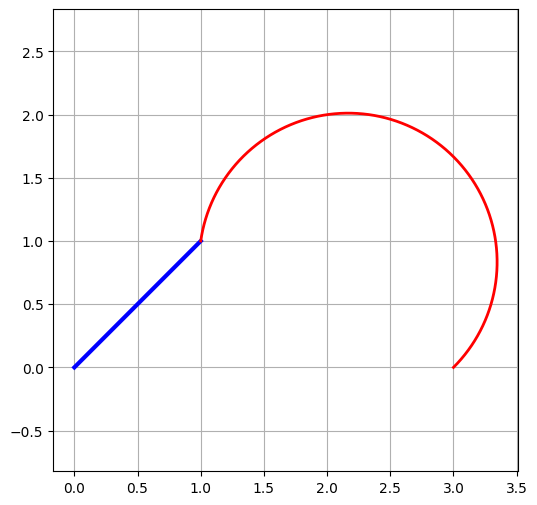

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Function to draw a line
# ---------------------------
def draw_line(p1, p2, width=1, raw=False, color='blue'):
    """
    Draw a line from p1 to p2.
    p1, p2: tuples (x, y)
    width: line width
    raw: if True, just plot points instead of plt.plot
    """
    x = [p1[0], p2[0]]
    y = [p1[1], p2[1]]
    if raw:
        plt.scatter(x, y, s=width*10, color=color)
    else:
        plt.plot(x, y, linewidth=width, color=color)

# ---------------------------
# Function to draw an arc passing 3 points
# ---------------------------
def draw_arc(p1, p2, p3, width=1, raw=False, color='red', n_points=100):
    """
    Draw arc passing through points p1, p2, p3
    """
    # Solve circle from 3 points
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    
    temp = x2**2 + y2**2
    bc = (x1**2 + y1**2 - temp) / 2.0
    cd = (temp - x3**2 - y3**2) / 2.0
    det = (x1 - x2)*(y2 - y3) - (x2 - x3)*(y1 - y2)
    if abs(det) < 1e-10:
        raise ValueError("Points are collinear")
    
    # Center of circle
    cx = (bc*(y2 - y3) - cd*(y1 - y2)) / det
    cy = ((x1 - x2)*cd - (x2 - x3)*bc) / det
    
    r = np.sqrt((cx - x1)**2 + (cy - y1)**2)
    
    # Compute angles
    angles = np.arctan2([y1 - cy, y2 - cy, y3 - cy], [x1 - cx, x2 - cx, x3 - cx])
    # Sort angles to go through p1->p2->p3
    angles = np.unwrap(angles)
    theta = np.linspace(angles[0], angles[2], n_points)
    
    x_arc = cx + r * np.cos(theta)
    y_arc = cy + r * np.sin(theta)
    
    if raw:
        plt.scatter(x_arc, y_arc, s=width*5, color=color)
    else:
        plt.plot(x_arc, y_arc, linewidth=width, color=color)

# ---------------------------
# Example usage
# ---------------------------
plt.figure(figsize=(6,6))
draw_line((0,0), (1,1), width=3)
draw_arc((1,1), (2,2), (3,0), width=2)
plt.axis('equal')
plt.grid(True)
plt.show()


Start: [ 78 -18]
Mid: [72.14213562 -3.85786438]
End: [58.  2.]


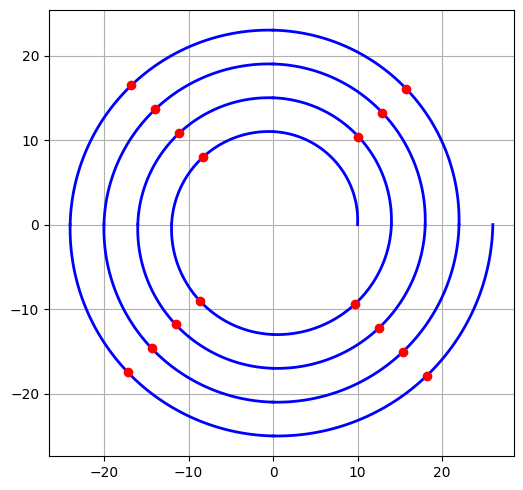

In [14]:
import numpy as np
import numpy as np
from copy import copy







def rotate_point(p, angle_deg):
    angle = np.deg2rad(angle_deg)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    return R @ p




import numpy as np

def rotate_around_center(p, center, angle_deg):
    """Rotate point p around a given center by angle_deg."""
    vec = p - center
    angle = np.deg2rad(angle_deg)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    return center + R @ vec

def start_center_angle_to_arc(start, center, sweep_angle_deg):
    """
    Given start point, center, and sweep angle, return start, mid, end for KiCad.
    """
    # End point: rotate start around center by full sweep
    end = rotate_around_center(start, center, sweep_angle_deg)
    
    # Mid point: rotate start by half sweep
    mid = rotate_around_center(start, center, sweep_angle_deg / 2)
    
    return start, mid, end

# Example usage
start = np.array([78, -18])      # your start point
center = np.array([58, -18])     # your arc center
sweep_angle = 90                 # degrees CCW

start_pt, mid_pt, end_pt = start_center_angle_to_arc(start, center, sweep_angle)
print("Start:", start_pt)
print("Mid:", mid_pt)
print("End:", end_pt)




def arc_90(p1, p2, direction=1, n=100):
    p1 = np.array(p1, dtype=float)
    p2 = np.array(p2, dtype=float)

    # Midpoint
    mid = (p1 + p2) / 2
    # Distance between p1 and p2
    d = np.linalg.norm(p2 - p1)

    # Radius of the circle for a 90° arc
    R = d / np.sqrt(2)

    # Unit perpendicular vector
    v = p2 - p1
    perp = np.array([-v[1], v[0]]) / np.linalg.norm(v)

    # Distance from midpoint to circle center
    h = np.sqrt(R**2 - (d/2)**2)

    # Two possible centers → choose by direction (+1 or -1)
    center = mid + direction * perp * h

    # Angles of p1 and p2 relative to center
    theta1 = np.arctan2(p1[1] - center[1], p1[0] - center[0])
    theta2 = np.arctan2(p2[1] - center[1], p2[0] - center[0])

    # Ensure we sweep 90° in correct direction
    if direction == 1 and theta2 < theta1:
        theta2 += 2*np.pi
    elif direction == -1 and theta1 < theta2:
        theta1 += 2*np.pi

    # Generate arc points
    theta = np.linspace(theta1, theta2, n)
    x = center[0] + R * np.cos(theta)
    y = center[1] + R * np.sin(theta)

    return x, y, center, R
import matplotlib.pyplot as plt


import numpy as np

def translate_radial(p, center, translation):
    """
    Move a point along the radial direction from the center.

    Parameters
    ----------
    p : array-like
        Original point (x, y).
    center : array-like
        Center of translation (cx, cy).
    translation : float
        Distance to move along the radius.
        Positive → away from center.
        Negative → toward center.

    Returns
    -------
    p2 : np.ndarray
        New translated point.
    """
    p = np.array(p, dtype=float)
    center = np.array(center, dtype=float)

    # Vector from center to p
    v = p - center
    r = np.linalg.norm(v)

    # Avoid division by zero (if p == center)
    if r == 0:
        return center + np.array([translation, 0])

    # Normalize and translate
    v_unit = v / r
    p2 = center + v_unit * (r + translation)
    return p2




p1 = np.array([10,0])
p2 =  rotate_point(p=p1, angle_deg=90)
p2= translate_radial(p2, center=(0,0), translation=1)



plt.figure(figsize=(6,6))

x, y, center, R = arc_90(p1, p2, direction=1)
plt.plot(x, y, 'b', linewidth=2, label="Arc")


p_old =copy(p2)
Nturns= 4
nsteps= 4
for i in range(nsteps*Nturns-1):

    p1= copy(p_old)

    p2 =  rotate_point(p=p1, angle_deg=360/nsteps)
    p2= translate_radial(p2, center=(0,0), translation=1)
    x, y, center, R = arc_90(p1, p2, direction=1)


    _,pm,_ = start_center_angle_to_arc(p1, center, 360/nsteps)
    
    plt.plot(x, y, 'b', linewidth=2, label="Arc")
    #plt.plot([pm[0]], [pm[0]], 'r', linewidth=10)
    plt.plot([pm[0]], [pm[1]], 'r', linewidth=10, marker="o")
    p_old =copy(p2)


plt.gca().set_aspect('equal')

plt.grid()

plt.show()




In [2]:
import numpy as np
from copy import copy
import matplotlib.pyplot as plt

def rotate_point(p, angle_deg):
    angle = np.deg2rad(angle_deg)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    return R.dot(p)
p1=np.array([1,0])
rotate_point(p=p1, angle_deg=45), rotate_point(p=p1, angle_deg=-90)

(array([0.70710678, 0.70710678]), array([ 6.123234e-17, -1.000000e+00]))

In [3]:
def middle(p1,p2):
    return (p1+p2)/2
p1=np.array([1,0])
p2=np.array([0,1])
middle(p1,p2)

array([0.5, 0.5])

In [4]:
def dist(p1,p2):
    return np.sqrt(((p1-p2)**2).sum())
dist(p1,p2)

np.float64(1.4142135623730951)

In [5]:
def third_point (p1,p2,C0):
    v1= (p1-p2)/2
    v2p= rotate_point(v1, angle_deg=90)
    v2n= rotate_point(v1, angle_deg=-90)
    c1p= p1-v1+v2p
    c1n= p1-v1+v2n
    if dist(C0,c1p) < dist(C0,c1n):
        c1= c1p
    else: 
        c1= c1n
    pmn= rotate_point(p1-c1, angle_deg=-45)
    pmp= rotate_point(p1-c1, angle_deg=45)
    if dist(p2,pmp) < dist(p2,pmn):
        pm= pmp+c1
    else :
        pm = pmn+c1
    r = dist(p1,c1)
    return c1, r,pm

In [6]:
def plot_points(ps,labels):
    for i,p in enumerate (ps):
        plt.plot([p[0]], [p[1]], linewidth=10, marker="o",label=labels[i])

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_arc_3_point(p1, p2, pm,width, n=200):
    p1, p2, pm = map(np.array, (p1, p2, pm))

    # Midpoints
    mid1 = (p1 + pm) / 2
    mid2 = (pm + p2) / 2

    # Slopes of lines
    d1 = pm - p1
    d2 = p2 - pm

    # Perpendicular slopes
    perp1 = np.array([-d1[1], d1[0]])
    perp2 = np.array([-d2[1], d2[0]])

    # Solve for intersection: mid1 + t*perp1 = mid2 + u*perp2
    A = np.column_stack([perp1, -perp2])
    b = mid2 - mid1
    t, u = np.linalg.solve(A, b)
    center = mid1 + t * perp1

    # Radius
    r = np.linalg.norm(p1 - center)

    # Angles
    theta1 = np.arctan2(p1[1] - center[1], p1[0] - center[0])
    theta2 = np.arctan2(p2[1] - center[1], p2[0] - center[0])
    thetam = np.arctan2(pm[1] - center[1], pm[0] - center[0])

    # Ensure correct direction: unwrap angles
    angles = np.array([theta1, thetam, theta2])
    angles = np.unwrap(angles)

    # Sort start, mid, end properly
    theta1, thetam, theta2 = angles

    # Generate arc points
    arc_thetas = np.linspace(theta1, theta2, n)
    arc_points = center + r * np.column_stack([np.cos(arc_thetas), np.sin(arc_thetas)])

    # Plot

    plt.plot(arc_points[:,0], arc_points[:,1], 'b',linewidth=width)


In [8]:
def plt_line(p1,p2,width=1,n=100):
    a = np.linspace(0,1,n)
    x,y= p1.reshape(-1,1)*a.reshape(-1,1).T+p2.reshape(-1,1)*(1-a.reshape(-1,1).T)
    plt.plot(x, y, 'b',linewidth=width)
def plt_rec(p1,p2,width=1,n=100):
    p11=np.array([p1[0],p2[1]])
    p22=np.array([p2[0],p1[1]])
    plt_line(p1,p11,width=1)
    plt_line(p11,p2,width=1)
    plt_line(p2,p22,width=1)
    plt_line(p22,p1,width=1)

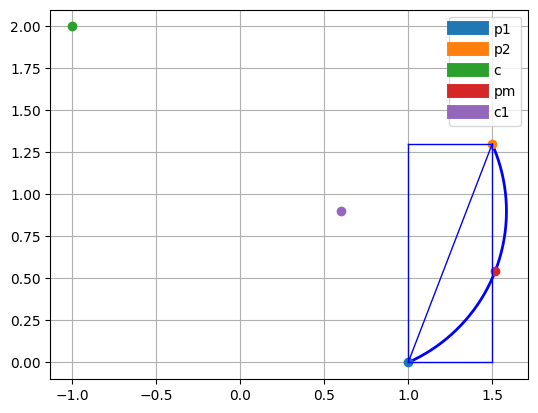

In [9]:
C0=np.array([-1,2])
p1= np.array([1,0])
p2= np.array([1.5,1.3])
#ps= python_draw_arc(c=C0,p=p,angle_deg=90,N=10)


c1, r,pm= third_point (p1,p2,C0)
plot_arc_3_point(p1, p2, pm,width=2)
plot_points(ps=[p1,p2,C0,pm,c1],labels=["p1","p2","c","pm","c1"])
#python_draw_arc(c=c1,p=p1,angle_deg=45,N=10)
plt_rec(p1,p2,width=1)
plt_line(p2,p1,width=1)
plt.gca().set_aspect('equal')
plt.legend()
plt.grid()

In [10]:
def spiral_rec(rec1,rec2,rec3,N=4,wCu=1):
    p1,p2= rec1
    plt_rec(p1,p2,width=1)
    p1,p2= rec2
    plt_rec(p1,p2,width=1)
    p1,p2= rec3
    plt_rec(p1,p2,width=1)


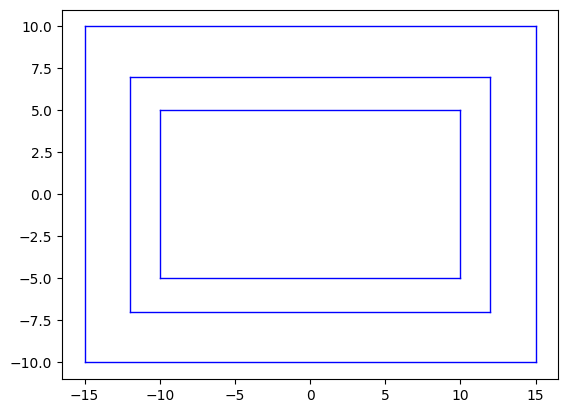

In [11]:
p1= np.array([10,5])
p2= -p1
rec1= (p1,p2)

p1= p1+2
p2= -p1
rec2= (p1,p2)

p1= p1+3
p2= -p1
rec3= (p1,p2)


spiral_rec(rec1,rec2,rec3,N=4,wCu=1)

# Simple code

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
from handcalcs import render 

In [51]:
%%render 
A = 21.8
B =16.8
C=15.8
E=5
N= 4
xa=(A-B)/2
xb=A/2-E/2
xc=A/2+E/2
xd= A-xa
xab= abs(xa-xb)
xdc=xab
xcb=E

<IPython.core.display.Latex object>

In [52]:
margin = 1.3
eCu=0.5
dx = (xb-margin)-(xa+margin)
lineW= (dx-(N-1)*eCu)/N
lineW

0.4500000000000002

In [53]:
xstart= xa+margin+lineW/2
ystart= 0+margin+lineW/2
Lx= xd-xa-2*margin-2*lineW/2
Ly= C+2*(N*lineW+eCu*(N-1)+margin)

In [54]:
from copy import copy 
def trans(p,v):
    return p+v

def plt_line(p1,p2,width=1):
    x= [p1[0],p2[0]]
    y= [p1[1],p2[1]]
    plt.plot(x, y, 'b',linewidth=width)

In [55]:
def plot_spiral (p1=np.array([0,0]),Lx=10,Ly=12,step = 1,N= 4,width=1,plot= True):
    #width = width_correction(width)

    points=[]


    vt=np.array([Lx,0])
    for i in range(4*N):
    
    
        
        #print(vt)
        p2= trans(p1,vt)
        if plot: 
            plt_line(p1,p2,width=width)
        points.append([p1,p2])
        p1 = copy(p2)
        
    
    
        
    
        match i%4 :
            case 0:
                vt=np.array([0,Ly])
                Ly=Ly-step
            case 1:
                vt=np.array([-Lx,0])
                Lx=Lx-step
            case 2:
                vt=np.array([0,-Ly])
                Ly=Ly-step
            case 3:
                vt=np.array([Lx,0])
                Lx=Lx-step
    return points
    

    

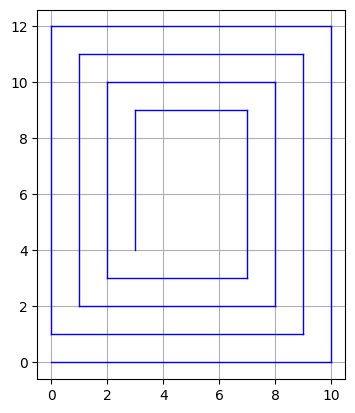

In [56]:
#plot_spiral (p1=np.array([0,0]),Lx=10,Ly=12,step = 1,N= 4,width=1)
points= plot_spiral (p1=np.array([0,0]),Lx=10,Ly=12,step = 1,N= 4,width=1)
plt.gca().set_aspect('equal')
#plt.legend()
plt.grid()
    

In [57]:
lineW, eCu

(0.4500000000000002, 0.5)

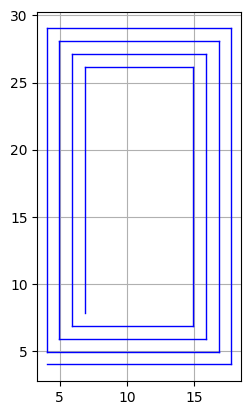

In [58]:
points= plot_spiral (p1=np.array([xstart,xstart]),Lx=Lx,Ly=Ly,step =lineW+eCu ,N= N, width= 1)
plt.gca().set_aspect('equal')
#plt.legend()
plt.grid()
    

In [65]:
pointsSpiral= plot_spiral (p1=np.array([xstart,xstart]),Lx=Lx,Ly=Ly,step =lineW+eCu ,N= N, width= 1, plot= False)

pointsSpiral = np.array(points).round(3).tolist()
pointsSpiral

[[[4.025, 4.025], [17.775, 4.025]],
 [[17.775, 4.025], [17.775, 29.025]],
 [[17.775, 29.025], [4.025, 29.025]],
 [[4.025, 29.025], [4.025, 4.975]],
 [[4.025, 4.975], [16.825, 4.975]],
 [[16.825, 4.975], [16.825, 28.075]],
 [[16.825, 28.075], [4.975, 28.075]],
 [[4.975, 28.075], [4.975, 5.925]],
 [[4.975, 5.925], [15.875, 5.925]],
 [[15.875, 5.925], [15.875, 27.125]],
 [[15.875, 27.125], [5.925, 27.125]],
 [[5.925, 27.125], [5.925, 6.875]],
 [[5.925, 6.875], [14.925, 6.875]],
 [[14.925, 6.875], [14.925, 26.175]],
 [[14.925, 26.175], [6.875, 26.175]],
 [[6.875, 26.175], [6.875, 7.825]]]

In [66]:
from copy import copy 
txt = """
(footprint "PlanarTransformer_ELP-102-20-38_4T:1T"
	(version 20241229)
	(generator "pcbnew")
	(generator_version "9.0")
	(layer "F.Cu")
    (uuid "uuid_")
    
"""

txt_rec="""
	(gr_rect
		(start xs_ ys_)
		(end   xe_ ye_)
		(stroke (width linewidth_) (type solid))
		(fill no)
		(layer "layerval_")
        (uuid "uuid_")
	)
"""



txt_line = """
	(gr_line
		(start xs_ ys_)
		(end xe_ ye_)
		(stroke
			(width linewidth_)
			(type default)
		)
		(layer "layerval_")
	)
"""


def make_kicad_file(points,linewidth= 1,layer="F.Cu"):
    txti= copy(txt)
    
    for ps in points: 
        tline = copy(txt_line)
        p1,p2= ps
        xs,ys=p1
        xe,ye=p2
        dic = {"layerval_": layer, 
               "linewidth_": str(linewidth), 
               "xe_":str(xe),
               "ye_":str(ye),
               "xs_":str(xs),
               "ys_":str(ys)}
        for k,v in dic.items()  :    
            tline =tline.replace(k, v)
        txti+=tline
    return txti
print(make_kicad_file(pointsSpiral,linewidth= 1,layer="F.Cu")  ) 
        
        
    


(footprint "PlanarTransformer_ELP-102-20-38_4T:1T"
	(version 20241229)
	(generator "pcbnew")
	(generator_version "9.0")
	(layer "F.Cu")
    (uuid "uuid_")


	(gr_line
		(start 4.025 4.025)
		(end 17.775 4.025)
		(stroke
			(width 1)
			(type default)
		)
		(layer "F.Cu")
	)

	(gr_line
		(start 17.775 4.025)
		(end 17.775 29.025)
		(stroke
			(width 1)
			(type default)
		)
		(layer "F.Cu")
	)

	(gr_line
		(start 17.775 29.025)
		(end 4.025 29.025)
		(stroke
			(width 1)
			(type default)
		)
		(layer "F.Cu")
	)

	(gr_line
		(start 4.025 29.025)
		(end 4.025 4.975)
		(stroke
			(width 1)
			(type default)
		)
		(layer "F.Cu")
	)

	(gr_line
		(start 4.025 4.975)
		(end 16.825 4.975)
		(stroke
			(width 1)
			(type default)
		)
		(layer "F.Cu")
	)

	(gr_line
		(start 16.825 4.975)
		(end 16.825 28.075)
		(stroke
			(width 1)
			(type default)
		)
		(layer "F.Cu")
	)

	(gr_line
		(start 16.825 28.075)
		(end 4.975 28.075)
		(stroke
			(width 1)
			(type default)
		)
		(layer "F.Cu")
	)

	